In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [34]:
data = pd.read_csv("data_for_regression_before_smote.csv")

In [35]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [36]:
data.dtypes

Year                    int64
Month                   int64
DayofMonth              int64
OriginAirportID         int64
DestAirportID           int64
DepDelayMinutes       float64
DepDel15              float64
CRSArrTime              int64
ArrTime               float64
ArrDelayMinutes       float64
ArrDel15              float64
rounded_CRSDepTime      int64
WindSpeedKmph           int64
WindDirDegree           int64
WeatherCode             int64
precipMM              float64
Visibilty               int64
Pressure                int64
Cloudcover              int64
WindChillF              int64
Humidity                int64
dtype: object

In [37]:
data.isnull().sum()

Year                  0
Month                 0
DayofMonth            0
OriginAirportID       0
DestAirportID         0
DepDelayMinutes       0
DepDel15              0
CRSArrTime            0
ArrTime               0
ArrDelayMinutes       0
ArrDel15              0
rounded_CRSDepTime    0
WindSpeedKmph         0
WindDirDegree         0
WeatherCode           0
precipMM              0
Visibilty             0
Pressure              0
Cloudcover            0
WindChillF            0
Humidity              0
dtype: int64

In [38]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'OriginAirportID', 'DestAirportID',
       'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15', 'rounded_CRSDepTime', 'WindSpeedKmph',
       'WindDirDegree', 'WeatherCode', 'precipMM', 'Visibilty', 'Pressure',
       'Cloudcover', 'WindChillF', 'Humidity'],
      dtype='object')

In [39]:
data = data.drop(['CRSArrTime','ArrTime','ArrDel15'], axis = 1) #Im removing these because these are information from future which can overfit my model.

In [40]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'OriginAirportID', 'DestAirportID',
       'DepDelayMinutes', 'DepDel15', 'ArrDelayMinutes', 'rounded_CRSDepTime',
       'WindSpeedKmph', 'WindDirDegree', 'WeatherCode', 'precipMM',
       'Visibilty', 'Pressure', 'Cloudcover', 'WindChillF', 'Humidity'],
      dtype='object')

In [41]:
X = data.drop(['ArrDelayMinutes'],axis=1)
Y = data['ArrDelayMinutes']

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [43]:
print("Number of samples in X:", X.shape[0])
print("Number of samples in Y:", Y.shape[0])

Number of samples in X: 1832252
Number of samples in Y: 1832252


**Linear Regression**

In [44]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
Y_pred_lr = lr_model.predict(X_test)

In [45]:
mse_lr = mean_squared_error(Y_test, Y_pred_lr)
r2_lr = r2_score(Y_test, Y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R^2: {r2_lr}")

Linear Regression MSE: 113.87688106491163
Linear Regression R^2: 0.9341210961615103


In [15]:
'''
MSE:
Lower MSE indicates better model performance, as it means that the predictions are closer to the actual values.
Higher MSE indicates poorer model performance, as it means that the predictions are further from the actual values.

R²:
R² = 1 indicates that the model perfectly explains the variance in the dependent variable.
R² = 0 indicates that the model does not explain any of the variance in the dependent variable.
Negative R² values can occur if the model is worse than a horizontal line (mean of the target variable).
'''

'\nMSE:\nLower MSE indicates better model performance, as it means that the predictions are closer to the actual values.\nHigher MSE indicates poorer model performance, as it means that the predictions are further from the actual values.\n\nR²:\nR² = 1 indicates that the model perfectly explains the variance in the dependent variable.\nR² = 0 indicates that the model does not explain any of the variance in the dependent variable.\nNegative R² values can occur if the model is worse than a horizontal line (mean of the target variable).\n'

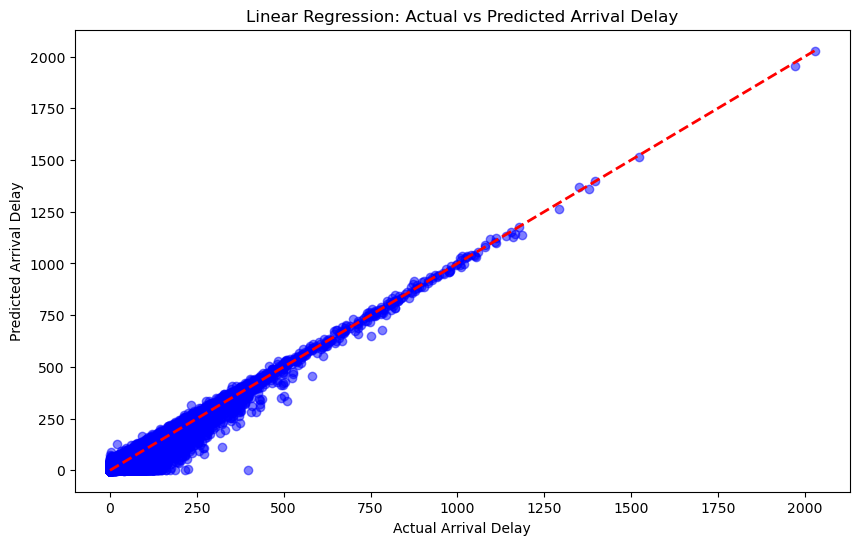

In [16]:
#Linear regression plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_lr, alpha=0.5, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--', color='red', linewidth=2)
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.title('Linear Regression: Actual vs Predicted Arrival Delay')
plt.show()

**Extra Trees Regressor**

In [49]:
et_reg_model = ExtraTreesRegressor()
et_reg_model.fit(X_train, Y_train.values.ravel())
Y_pred_et_reg = et_reg_model.predict(X_test)

In [50]:
mse_et_reg = mean_squared_error(Y_test, Y_pred_et_reg)
r2_et_reg = r2_score(Y_test, Y_pred_et_reg)
print(f"Extra Trees Regressor MSE: {mse_et_reg}")
print(f"Extra Trees Regressor R^2: {r2_et_reg}")

Extra Trees Regressor MSE: 111.97093052721168
Extra Trees Regressor R^2: 0.9352237074292221


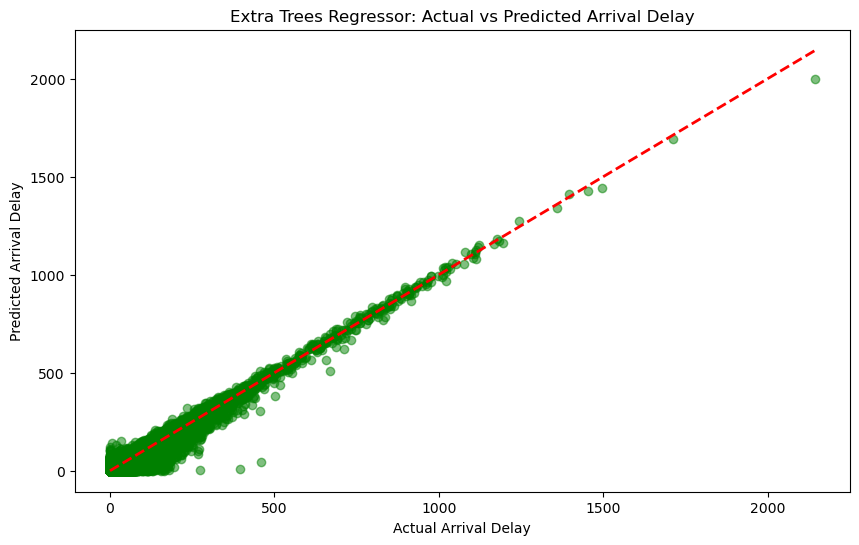

In [51]:
# Extra Trees Regressor plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_et_reg, alpha=0.5, color='green')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--', color='red', linewidth=2)
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.title('Extra Trees Regressor: Actual vs Predicted Arrival Delay')
plt.show()

**XGBoost Regressor**

In [46]:
xgb_reg_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
xgb_reg_model.fit(X_train, Y_train.values.ravel())
Y_pred_xgb_reg = xgb_reg_model.predict(X_test)

In [47]:
mse_xgb_reg = mean_squared_error(Y_test, Y_pred_xgb_reg)
r2_xgb_reg = r2_score(Y_test, Y_pred_xgb_reg)
print(f"XGBoost Regressor MSE: {mse_xgb_reg}")
print(f"XGBoost Regressor R^2: {r2_xgb_reg}")

XGBoost Regressor MSE: 182.1538323896448
XGBoost Regressor R^2: 0.8946222034218733


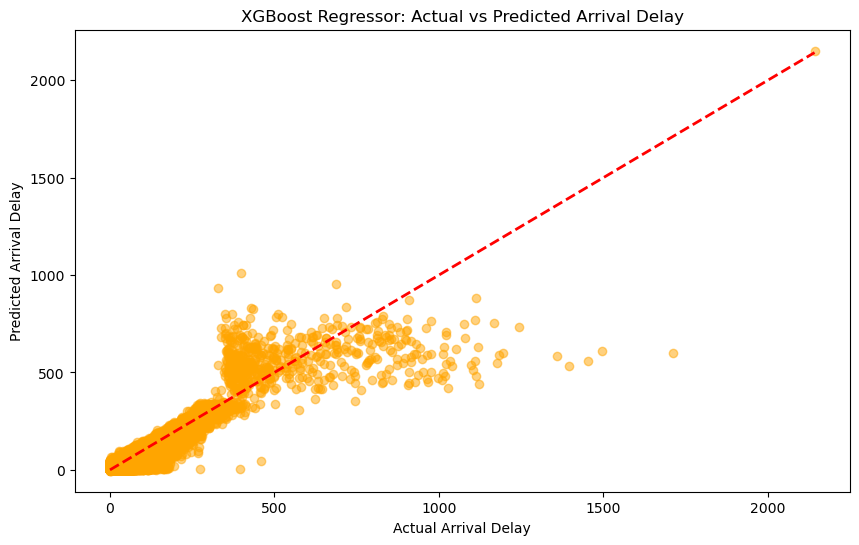

In [48]:
# XGBoost Regressor plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_xgb_reg, alpha=0.5, color='orange')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--', color='red', linewidth=2)
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.title('XGBoost Regressor: Actual vs Predicted Arrival Delay')
plt.show()

**Random Forest Regressor**

In [52]:
rf_reg_model = RandomForestRegressor()
rf_reg_model.fit(X_train, Y_train.values.ravel())
Y_pred_rf_reg = rf_reg_model.predict(X_test)

In [53]:
mse_rf_reg = mean_squared_error(Y_test, Y_pred_rf_reg)
r2_rf_reg = r2_score(Y_test, Y_pred_rf_reg)
print(f"Random Forest Regressor MSE: {mse_rf_reg}")
print(f"Random Forest Regressor R^2: {r2_rf_reg}")

Random Forest Regressor MSE: 108.65277000464671
Random Forest Regressor R^2: 0.9371432961634985


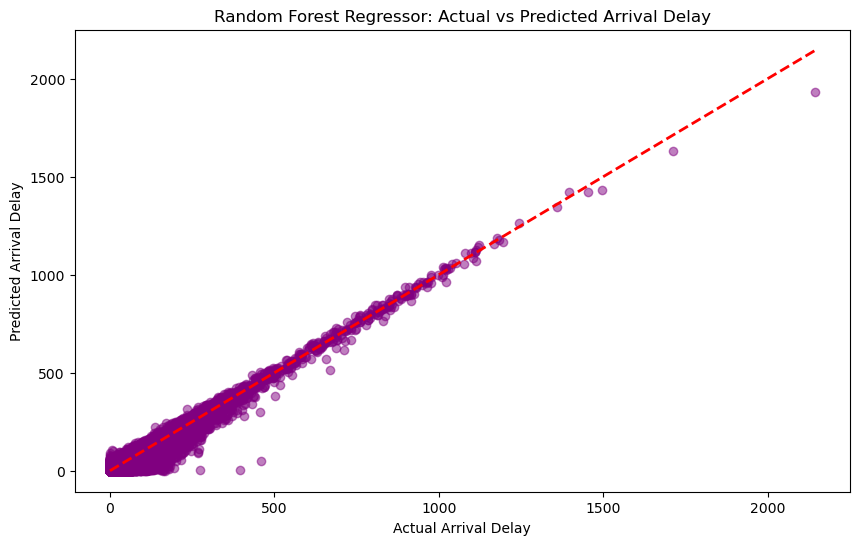

In [54]:
# Random Forest Regressor plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_rf_reg, alpha=0.5, color='purple')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--', color='red', linewidth=2)
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.title('Random Forest Regressor: Actual vs Predicted Arrival Delay')
plt.show()

**Testing for any overfitting**

**How am I testing?** <br>
Excluded CRSArrTime and ArrTime: These columns are not included in the feature set to avoid data leakage. <br>
Retained Relevant Features: Only the relevant features that are known before the flight arrival are used. <br>
Cross-Validation and Regularization: Use cross-validation to evaluate model performance and Ridge regression to handle potential overfitting.


In [31]:

# Filter the data for delayed flights
data = data[data['ArrDelayMinutes'] > 0]

# Select relevant features and target variable
features = ['Year', 'Month', 'DayofMonth', 'OriginAirportID', 'DestAirportID',
            'DepDelayMinutes', 'DepDel15', 'rounded_CRSDepTime',
            'WindSpeedKmph', 'WindDirDegree', 'WeatherCode', 'precipMM', 
            'Visibilty', 'Pressure', 'Cloudcover', 'WindChillF', 'Humidity']

target = 'ArrDelayMinutes'

X = data[features]
y = data[target]

# Handle missing values by filling with mean (or another strategy)
X.fillna(X.mean(), inplace=True)

# Encode categorical variables if any (using one-hot encoding)
X = pd.get_dummies(X, columns=['OriginAirportID', 'DestAirportID', 'WeatherCode'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Ridge regression model with cross-validation
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Cross-validation to check for overfitting
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R-squared scores: {cv_scores}')
print(f'Mean Cross-Validation R-squared score: {np.mean(cv_scores)}')

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

/var/folders/x3/6tds_w9j0lb0pr8y5qsz97tm0000gn/T/ipykernel_2301/1050984383.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Cross-Validation R-squared scores: [0.93329082 0.93429617 0.93430598 0.933324   0.93320919]
Mean Cross-Validation R-squared score: 0.9336852322194208
Mean Absolute Error: 10.601218658594858
Mean Squared Error: 246.34234290644915
R-squared: 0.9341807133434173


**Checking for multicollinearity**

In [27]:
alphas = [0.1, 1.0, 10.0, 100.0]
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Cross-validation to check for overfitting
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f'Alpha: {alpha}')
    print(f'Cross-Validation R-squared scores: {cv_scores}')
    print(f'Mean Cross-Validation R-squared score: {np.mean(cv_scores)}')
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print('-'*40)


Alpha: 0.1
Cross-Validation R-squared scores: [0.93329082 0.93429617 0.93430597 0.933324   0.93320919]
Mean Cross-Validation R-squared score: 0.9336852321006905
Mean Absolute Error: 10.601218527272415
Mean Squared Error: 246.34231542672552
R-squared: 0.9341807206856216
----------------------------------------
Alpha: 1.0
Cross-Validation R-squared scores: [0.93329082 0.93429617 0.93430598 0.933324   0.93320919]
Mean Cross-Validation R-squared score: 0.9336852322194208
Mean Absolute Error: 10.601218658594858
Mean Squared Error: 246.34234290644915
R-squared: 0.9341807133434173
----------------------------------------
Alpha: 10.0
Cross-Validation R-squared scores: [0.93329078 0.93429617 0.93430601 0.93332401 0.93320919]
Mean Cross-Validation R-squared score: 0.9336852326977686
Mean Absolute Error: 10.601220014850888
Mean Squared Error: 246.34261939859877
R-squared: 0.9341806394685169
----------------------------------------
Alpha: 100.0
Cross-Validation R-squared scores: [0.9332903  0.9342

Analysis of Results <br>
**Cross-Validation Scores:** The mean cross-validation R-squared scores are all around 0.9337, with very little variation across different values of alpha. This indicates consistent performance and suggests that the model is not overfitting. <br>
**Test Set Evaluation:** The R-squared values on the test set are all around 0.934, with MAE and MSE remaining stable across different alpha values.<br>
Given these results, it appears that your model is performing well without significant overfitting. However, it’s always good to conduct a thorough examination to ensure the model's robustness.